# check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


In [2]:
import pandas as pd
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr

In [3]:
dataset = pd.read_csv('Add_sales_data_2018.csv')
dataset.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
dataset.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


C:\Users\Nisha\anaconda3\lib\site-packages\seaborn\matrix.py:298: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

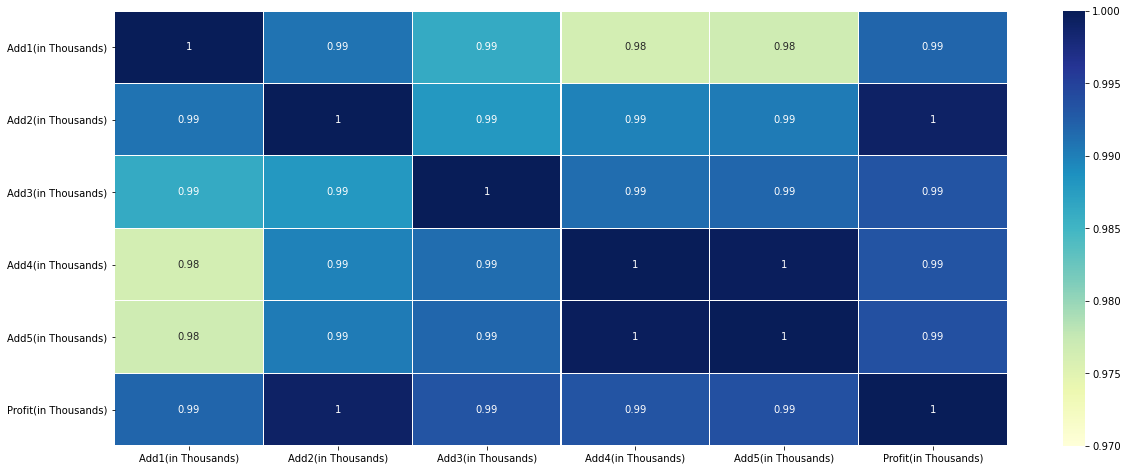

In [5]:
corr_matrix=dataset.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr_matrix,vmin=0.97,vmax=1,annot=True,Linewidths=0.2,cmap='YlGnBu')

The amount spent for advertising through five different companies and profit generated are highly correlated
there are some feaures have same high positive correlation.

In [ ]:
The amount spent for advertising through five different companies and profit generated is highly correlated and the strongest corelation is observed in add2 vs profit generated.

# Build a regression model to predict the profit from the given data and comment your findings on it.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [14]:
data1=dataset.drop(['Date','Add1(in Thousands)','Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'],axis=1)
data2=dataset.drop(['Date'],axis=1)

In [15]:
y=data1['Profit(in Thousands)'] 
x=data1.drop(['Profit(in Thousands)'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [17]:
from sklearn import linear_model
lr1=linear_model.LinearRegression()

In [18]:
model1=lr1.fit(x_train,y_train)

In [19]:
prediction1=model1.predict(x_test)

Actual & Predicted Values

In [20]:
profit_test_values=pd.DataFrame(y_test)
profit_test_values.reset_index(drop=True, inplace=True)
profit_test_values.columns=['Actual test values of profit']
profit_predictions=pd.DataFrame(prediction1)
profit_predictions.columns=['Profit predicted using linear regression']
ex_col=profit_predictions['Profit predicted using linear regression']
profit_test_values.join(ex_col)

,Actual test values of profit,Profit predicted using linear regression
0,4152.066,4155.905210
1,4446.441,4447.632917
2,5131.898,5240.944067
3,4907.560,4904.986676
4,5004.282,4997.210274
5,4623.793,4619.846369
6,5384.175,5384.925806
7,5328.025,5337.872950
8,5175.051,5158.131041
9,5956.323,5951.442191


In [22]:
from sklearn.metrics import mean_squared_error
print("When Advertisement 2 is the only independent variable, then MSE is",mean_squared_error(y_test,prediction1))

When Advertisement 2 is the only independent variable, then MSE is 463.55463495588356


Mean square error in first case is high

# Predict the profit generated by the company, if they wish to spend the following amount for advertisement

In [25]:
Add2=[[312]]
profit_predicted1=model1.predict(Add2).item()
print("the anticipated profit(in thousands) from the advertisements for add2 is %0.2f"%profit_predicted1)

the anticipated profit(in thousands) from the advertisements for add2 is 5817.81
